In [2]:
import pandas as pd
from matplotlib_venn import venn2, venn3
import matplotlib.pyplot as plt

fixed_columns = ["Average Noise", "Exp. m/z", "Recal m/z", "Theor. Mass", "Error", "Rel. Abundance", "Signal2Noise", "DBE", "H/C", "O/C", "Molecular Formula"]

In [3]:
csv_file_path = r'C:\Users\hp\Desktop\bmsis-ysp\Elemental Composition assignments (.csv)\2023March23NegESI_17_Mars_Meteorites126p8_Sum200.csv'

# Read the CSV file starting from the third row
data = []
max_extra_columns = 0

with open(csv_file_path, 'r') as file:
    # Skip the first two rows
    for _ in range(2):
        next(file)
    
    # Process each row in the file
    for line in file:
        # Split the row by comma
        row = line.strip().split(',')
        fixed_part = row[:len(fixed_columns)]
        extra_part = row[len(fixed_columns):]
        
        # Update the maximum number of extra columns seen
        max_extra_columns = max(max_extra_columns, len(extra_part))
        
        # Combine the fixed part with the extra part
        data.append(fixed_part + extra_part)

# Create column names for extra columns
extra_columns = [f'Extra Col {i+1}' for i in range(max_extra_columns)]
all_columns = fixed_columns + extra_columns

# Create the DataFrame
df = pd.DataFrame(data, columns=all_columns)

In [4]:
df.head()

,Average Noise,Exp. m/z,Recal m/z,Theor. Mass,Error,Rel. Abundance,Signal2Noise,DBE,H/C,O/C,...,Extra Col 7,Extra Col 8,Extra Col 9,Extra Col 10,Extra Col 11,Extra Col 12,Extra Col 13,Extra Col 14,Extra Col 15,Extra Col 16
0,1,603.68135,603.68135,603.68132637,-0.0391430195283,0.0481,0,0.0,2.04651162791,0,...,0,S,0,13C,0,,None,None,None,None
1,2,671.65003,671.65003,671.650026242,-0.00559545875368,0.039,0,8.0,1.71428571429,0,...,0,S,0,13C,0,,None,None,None,None
2,3,683.65007,683.65007,683.650026242,-0.0640067115509,0.0343,0,9.0,1.68,0,...,0,S,0,13C,0,,None,None,None,None
3,4,761.60309,761.60309,761.603076049,-0.018317428602,0.067,0,19.0,1.36842105263,0,...,0,S,0,13C,0,,None,None,None,None
4,5,807.58754,807.58754,807.587425985,-0.141179451713,0.0396,0,24.0,1.24590163934,0,...,0,S,0,13C,0,,None,None,None,None


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21219 entries, 0 to 21218
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Average Noise      21219 non-null  object
 1   Exp. m/z           21219 non-null  object
 2   Recal m/z          21219 non-null  object
 3   Theor. Mass        21219 non-null  object
 4   Error              21219 non-null  object
 5   Rel. Abundance     21219 non-null  object
 6   Signal2Noise       21219 non-null  object
 7   DBE                21219 non-null  object
 8   H/C                21219 non-null  object
 9   O/C                21219 non-null  object
 10  Molecular Formula  21219 non-null  object
 11  Extra Col 1        21219 non-null  object
 12  Extra Col 2        21219 non-null  object
 13  Extra Col 3        21219 non-null  object
 14  Extra Col 4        21219 non-null  object
 15  Extra Col 5        21219 non-null  object
 16  Extra Col 6        21219 non-null  objec

In [28]:
df.iloc[21218]

Average Noise                      32
Exp. m/z                    466.07596
Recal m/z                   466.07596
Theor. Mass              466.07592181
Error                -0.0819387534074
Rel. Abundance              0.0479366
Signal2Noise                        0
DBE                               7.5
H/C                     1.38461538462
O/C                    0.846153846154
Molecular Formula                   C
Extra Col 1                        13
Extra Col 2                         H
Extra Col 3                        17
Extra Col 4                         N
Extra Col 5                         4
Extra Col 6                         O
Extra Col 7                        11
Extra Col 8                         S
Extra Col 9                         0
Extra Col 10                      13C
Extra Col 11                        1
Extra Col 12                     24Mg
Extra Col 13                        1
Extra Col 14                       Na
Extra Col 15                        1
Extra Col 16

In [29]:
import pandas as pd

# Assuming df has already been created and contains the necessary columns

# Define the fixed column names
fixed_columns = [
    "Average Noise", "Exp. m/z", "Recal m/z", "Theor. Mass", "Error", 
    "Rel. Abundance", "Signal2Noise", "DBE", "H/C", "O/C", "Molecular Formula"
]

# Identify the starting index for merging
start_idx = df.columns.get_loc("Molecular Formula")

# Extract the relevant columns to be merged
cols_to_merge = df.columns[start_idx:]

# Merge the columns into the 'Molecular Formula' column
df['Molecular Formula'] = df[cols_to_merge].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

# Drop the extra columns after merging
df = df.drop(columns=cols_to_merge.difference(['Molecular Formula']))

In [30]:
df.head()

,Average Noise,Exp. m/z,Recal m/z,Theor. Mass,Error,Rel. Abundance,Signal2Noise,DBE,H/C,O/C,Molecular Formula
0,1,481.08738,481.08738,481.087315697,-0.133661994257,0.0521925,0,31.0,0.378378378378,0,C 37 H 13 N 0 O 0 S 0 13C 0 24Mg 1
1,2,523.13432,523.13432,523.134265889,-0.103435529938,0.0474368,0,31.0,0.5,0,C 40 H 19 N 0 O 0 S 0 13C 0 24Mg 1
2,3,535.13432,535.13432,535.134265889,-0.101116062772,0.0900512,0,32.0,0.487804878049,0,C 41 H 19 N 0 O 0 S 0 13C 0 24Mg 1
3,4,549.14999,549.14999,549.149915953,-0.134838461895,0.079436,0,32.0,0.52380952381,0,C 42 H 21 N 0 O 0 S 0 13C 0 24Mg 1
4,5,563.16563,563.16563,563.165566018,-0.113612042063,0.0634785,0,32.0,0.558139534884,0,C 43 H 23 N 0 O 0 S 0 13C 0 24Mg 1


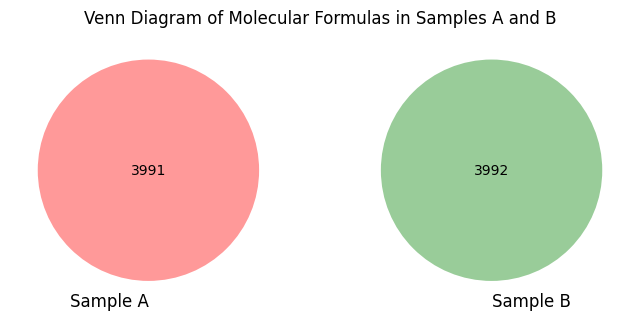

Shared Formulas Count: 0
Unique Formulas in Sample A Count: 3991
Unique Formulas in Sample B Count: 3992


In [6]:
# Since each row represents a unique sample, we will assume two sets of data for samples A and B
# Assuming the first half of the data belongs to Sample A and the second half to Sample B
# Adjust the splitting logic based on your actual dataset if different

# Split the DataFrame into two samples (A and B)
mid_index = len(df) // 2
sample_A_df = df.iloc[:mid_index]
sample_B_df = df.iloc[mid_index:]

# Extract unique molecular formulas for each sample
sample_A_formulas = set(sample_A_df[' Molecular Formula'])
sample_B_formulas = set(sample_B_df[' Molecular Formula'])

# Create the Venn diagram for Samples A and B
plt.figure(figsize=(8, 8))
venn2([sample_A_formulas, sample_B_formulas], ('Sample A', 'Sample B'))
plt.title("Venn Diagram of Molecular Formulas in Samples A and B")
plt.show()

# Determine unique and shared formulas between Samples A and B
shared_formulas = sample_A_formulas & sample_B_formulas
unique_to_A = sample_A_formulas - sample_B_formulas
unique_to_B = sample_B_formulas - sample_A_formulas

# Print the counts for each set
print("Shared Formulas Count:", len(shared_formulas))
print("Unique Formulas in Sample A Count:", len(unique_to_A))
print("Unique Formulas in Sample B Count:", len(unique_to_B))

---